In [1]:
import pandas as pd
import numpy as np
import os
from env import host, user, password
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer
import scipy
import sklearn.linear_model
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
import wrangle
import viz_explore
import scipy.stats as stats

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.

### 3. Bonus: Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [2]:
# THE WRANGLE FUNCTION PERFORMS THE FOLLOWIN, IN BROAD STROKES:
# 1. Get the data via SQL query
# 2. Clean and prep the data
# 3. Encode the appropriate columns (only ['county'] for now)
# 4. Split the data: train, validate, test and X_ vs y_ splits as well
# 5. Scale the data (all train, validate and test, and all X_ and y_ splits are scaled)

df, train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, \
train_scaled, X_train_scaled, y_train_scaled, validate_scaled, X_validate_scaled, \
y_validate_scaled, test_scaled, X_test_scaled, y_test_scaled \
= wrangle.wrangle_zillow()


In [3]:
df.shape

(61427, 31)

In [4]:
df.dtypes

parcelid                 int64
bathrooms              float64
bedrooms               float64
condition              float64
sq_ft                  float64
full_baths             float64
latitude               float64
longitude              float64
lot_size               float64
census_tract           float64
city_id                float64
zip                    float64
rooms                  float64
structure_value        float64
tax_value              float64
year_assessed          float64
land_value             float64
tax_amount             float64
logerror               float64
county                  object
age                    float64
sq_ft_per_bathroom     float64
sq_ft_per_bedroom      float64
sq_ft_per_room         float64
has_half_bath            int64
age_bin               category
tax_rate               float64
price_per_sq_ft        float64
Los_Angeles              uint8
Orange                   uint8
Ventura                  uint8
dtype: object

In [5]:
# for col in df.columns:
#     print(df[col].value_counts())

There may be a few duplicated parcel ids

In [6]:
df.lot_size.head()

1     12647.0
2      8432.0
3     13038.0
4    278581.0
5       903.0
Name: lot_size, dtype: float64

In [7]:
X_train_scaled.head().T

,0,1,2,3,4
parcelid,0.022568,0.013471,0.001826,0.000313,0.042757
bathrooms,0.333333,0.333333,0.333333,0.000000,0.666667
bedrooms,0.800000,0.400000,0.200000,0.200000,0.600000
condition,0.454545,0.454545,0.636364,0.454545,0.454545
sq_ft,0.814802,0.312370,0.235233,0.222377,0.659138
full_baths,0.333333,0.333333,0.333333,0.000000,0.666667
latitude,0.388363,0.377198,0.616169,0.549232,0.635237
longitude,0.806060,0.760380,0.560645,0.415546,0.320844
lot_size,0.001600,0.000909,0.029919,0.000706,0.001086
census_tract,0.296321,0.005450,0.000013,0.009458,0.999979


<AxesSubplot:>

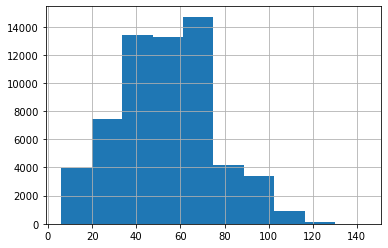

In [8]:
df.age.hist()

In [9]:
df.age.std()

22.12551106386077

In [10]:
df.age.mean()

54.001139564035356

In [11]:
pd.cut(df.age, bins=[0,20,40,80,120,200], labels = [1,2,3,4,5])

1        3
2        3
3        3
4        3
5        2
        ..
77569    3
77570    4
77571    3
77572    3
77573    3
Name: age, Length: 61427, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

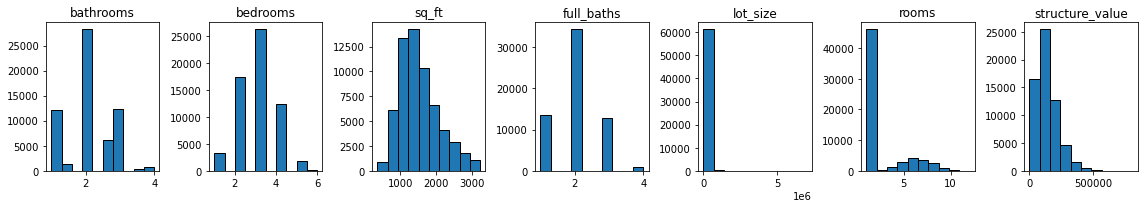

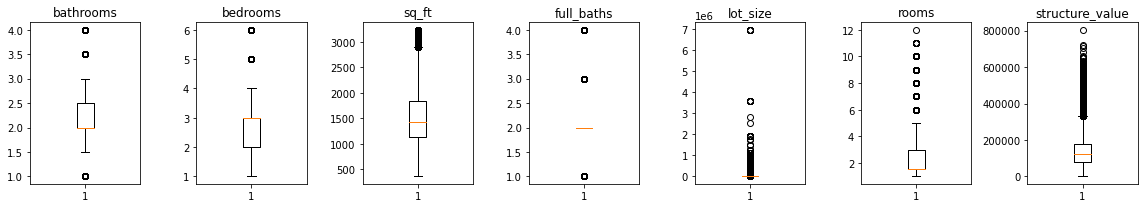

In [12]:
viz_explore.histograms1(df)

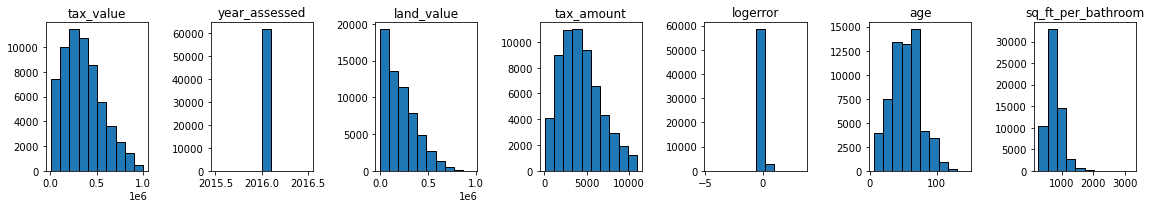

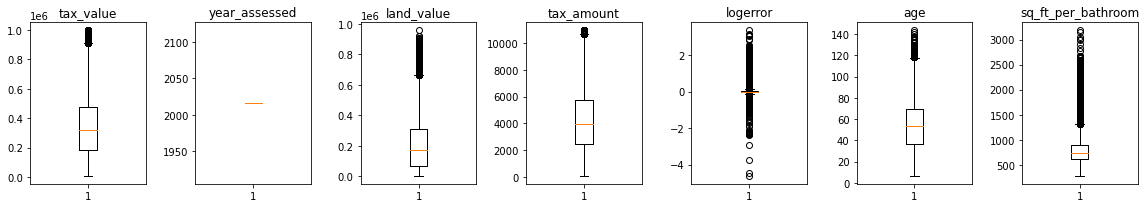

In [13]:
viz_explore.hists2(df)

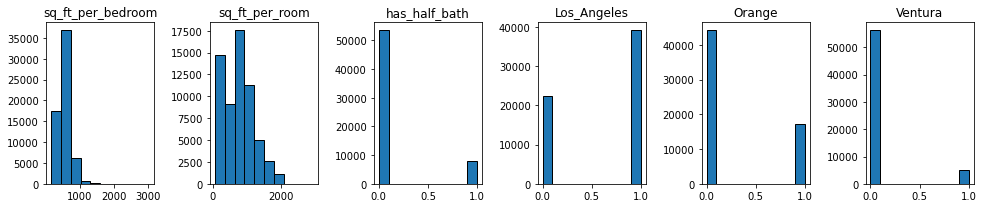

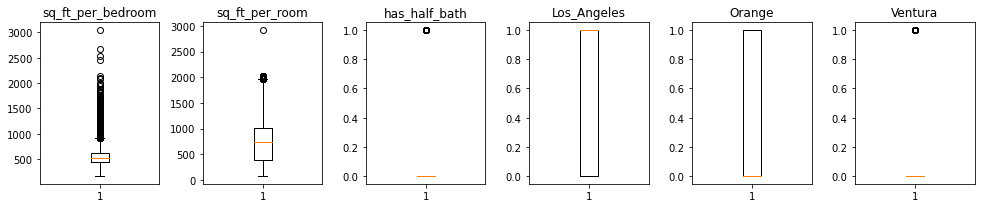

In [14]:
viz_explore.hists3(df)

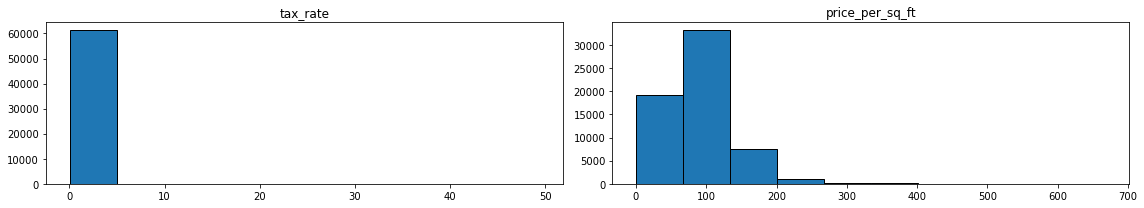

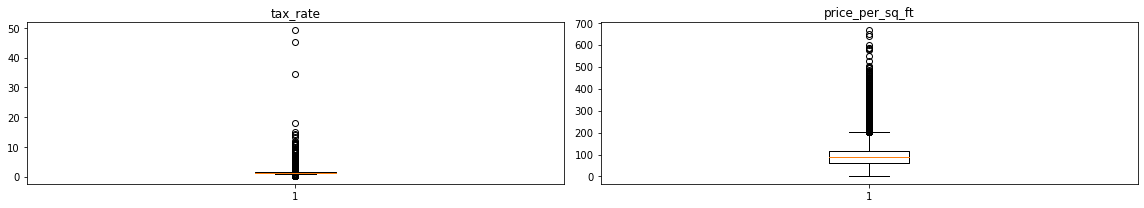

In [16]:
viz_explore.hists4(df)

In [15]:
df.sq_ft_per_room.value_counts()

753.482490    129
703.250324    118
678.134241    109
985.806257     98
791.156614     94
             ... 
180.833333      1
302.250000      1
366.875000      1
309.333333      1
181.285714      1
Name: sq_ft_per_room, Length: 7064, dtype: int64

In [ ]:
df.sq_ft_per_room.hist()

There aree 13 homes with 2 half baths

In [ ]:
df[(df.bathrooms - df.full_baths) == 1.0]

## Is there a time period that has a higher or lower log error?
Bin the age group--ten bins? And see results.  Hue on county...if that makes a difference

In [ ]:
sns.scatterplot(x='age', y='logerror', data=train)

In [ ]:
sns.relplot(
    data=train,
    y='logerror',
    x='age',
    col=pd.cut(df.age, bins=[0,40,80,120,200]),
)

Things look a little tighter on either end...the 40-60 and the 60-80 look like they have a wider distribution of logerror

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age_bin', y='logerror', data= train)

Still looks like there are more outliers in the middle, but this could be due to more data being available in those age bins

In [ ]:
sns.histplot(data=train, x= df[df.age_bin == pd.Interval(0, 40)].logerror)

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(data=df, x= train[train.age_bin == pd.Interval(0, 40)].logerror)
plt.title("0 to 40")
plt.subplot(1,4,2)
sns.histplot(data=df, x= train[train.age_bin == pd.Interval(40,80)].logerror)
plt.title("40 to 80")
plt.subplot(1,4,3)
sns.histplot(data=df, x= train[train.age_bin == pd.Interval(80,120)].logerror)
plt.title("80 to 120")
plt.subplot(1,4,4)
sns.histplot(data=df, x= train[train.age_bin == pd.Interval(120,200)].logerror)
plt.title("120 and up")
# plt.subplot(1,7,5)
# sns.histplot(data=df, x= train[train.age_bin == pd.Interval(80, 100)].logerror)
# plt.title("80 to 100")
# plt.subplot(1,7,6)
# sns.histplot(data=df, x= train[train.age_bin == pd.Interval(100, 120)].logerror)
# plt.title("100 to 120")
# plt.subplot(1,7,7)
# sns.histplot(data=df, x= train[train.age_bin == pd.Interval(120, 200)].logerror)
# plt.title("120 and Up")

Looking at logerror by age_bin, they are generally normally distributed

Maybe run an ANOVA test to see about the variances? 

First, Levene

In [ ]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.age_bin == pd.Interval(0, 40)].logerror,
    train[train.age_bin == pd.Interval(40,80)].logerror,
    train[train.age_bin == pd.Interval(80,120)].logerror,
    train[train.age_bin == pd.Interval(120,200)].logerror,
#     train[train.age_bin == pd.Interval(80,100)].logerror,
#     train[train.age_bin == pd.Interval(100,120)].logerror,
#     train[train.age_bin == pd.Interval(120,200)].logerror
)

The results show that the null hypothesis is rejected

In [ ]:
train[train.age_bin == pd.Interval(0, 40)].logerror.var()

In [ ]:
train[train.age_bin == pd.Interval(120,200)].logerror.var()

#### Anova testing of the logerror by age_bin

Set Hypothesis
- 𝐻0 : Population means of logerror (by age_bin) are equal
- 𝐻𝑎 : Population means of logerror (by age_bin) are not all equal

In [ ]:
# This cell runs an ANOVA test on the different 'age_bins'
# We are demonstrating statistically that the age correlates to the logerror
f, p = stats.f_oneway(
    train[train.age_bin == pd.Interval(0, 40)].logerror,
    train[train.age_bin == pd.Interval(40,80)].logerror,
    train[train.age_bin == pd.Interval(80,120)].logerror,
    train[train.age_bin == pd.Interval(120,200)].logerror)
          
#     train[train.age_bin == pd.Interval(80,100)].logerror,
#     train[train.age_bin == pd.Interval(100,120)].logerror,
#     train[train.age_bin == pd.Interval(120,200)].logerror
#
f, p

In [ ]:
# Setting our alpha and returning a statemtent on the validity of the ANOVA test by comparing alpha to the resulting p-value

alpha = 0.05
if p < alpha:
    print("We reject H_O")
else:
    print("We fail to reject $H_{0}$")

#### The anova test shows I can proceed with the understanding that the average logerror is different depending on the age of the home

In [ ]:
df.columns

In [ ]:
sns.relplot(data=train, y='logerror', x='age', col='county')

This relplot shows age and logerror by county; any dignificant differences between the counties aren't clear

### What about a relationship between tax_value and logerror? (also: are these related targets?)

In [ ]:
sns.scatterplot(x=train.tax_value, y=train.logerror, data=train)

In [ ]:
sns.scatterplot(x=train.tax_value, y=train.logerror, data=train, hue='county', alpha=.5)

In [ ]:
sns.relplot(x=train.tax_value, y=train.logerror, data=train, col='county', alpha=.5)

In [ ]:
train[train.county=='Los_Angeles'].shape

In [ ]:
train[train.county=='Orange'].shape

In [ ]:
train[train.county=='Ventura'].shape

### No clear impressions

In [ ]:
sns.lmplot(x='tax_value', y='logerror', data=train, scatter_kws={'alpha':.2},hue='county')

### Look like perfectly flat trend lines

In [ ]:
train.head().T

## Does the condition of the home have an impact on the logerror?

In [ ]:
sns.barplot(x=train.condition,y=train.logerror, data=train)

Ok, the logerror is off by more on the houses with a condition of 1 and 3

### An ANOVA test might be in order to show this:

First, a Levene test to check on variances:

#H0: Variances are equal
#Ha: Variances are not equal

In [ ]:
train['condition'].hist()

Roughly normally distributed

In [ ]:
# Levene test for equal variances...they aren't equal
stats.levene(train.condition==1,train.condition==3,train.condition==4,train.condition==5,
            train.condition==6,train.condition==7,train.condition==8,train.condition==9,
            train.condition==10, train.condition==11,train.condition==12)

Set Hypothesis (for the ANOVA test)
- 𝐻0 : Population means of logerror (by condition) are equal
- 𝐻𝑎 : Population means of logerror (by condition) are not all equal

In [ ]:
# the anova test:
f, p = stats.f_oneway(train.condition==1,train.condition==3,train.condition==4,train.condition==5,
            train.condition==6,train.condition==7,train.condition==8,train.condition==9,
            train.condition==10, train.condition==11,train.condition==12)
f,p

In [ ]:
# Setting our alpha and returning a statemtent on the validity of the ANOVA test by comparing alpha to the resulting p-value

alpha = 0.05
if p < alpha:
    print("We reject H_O")
else:
    print("We fail to reject $H_{0}$")

In [ ]:
sns.barplot(x=train.rooms,y=train.logerror, data=train)
plt.tight_layout

## OK, let's answer a simple question for now:

## Does (or...how does?) logerror differ by county?

In [ ]:
sns.boxplot(x=train.county, y=train.logerror)

In [ ]:
sns.barplot(x=train.county, y=train.logerror)

### Running a nope, also an ANOVA to check on this

H_0: Average logerror of the three counties is the same


H_a: The logerror is different according to county

In [ ]:
# Assumptions: independence, yes.  Normal: yes (also large sample). Variances....
train.Orange.var()

In [ ]:
train.Los_Angeles.var()

In [ ]:
train.Ventura.var()

Definitely different variances, so set that in the test

In [ ]:
f,p = scipy.stats.f_oneway(train.Orange,train.Los_Angeles,train.Ventura)
f,p

In [ ]:
# Setting our alpha and returning a statemtent on the validity of the ANOVA test by comparing alpha to the resulting p-value

alpha = 0.05
if p < alpha:
    print("We reject H_O")
else:
    print("We fail to reject $H_{0}$")

And thus, we conclude that the means of the different logerrors by county are different

In [ ]:
train.head().T

## Does my whole theory about half bathrooms bear out??

In [ ]:
sns.barplot(x=train.has_half_bath,y=train.logerror)

OK, well there is some difference, for what it's worth...proceeding to stats testing via one sided, independent t test

First: assumptions:

- Normally distributed....mmm basically yes and many observations
- Independence: check
- Variances...are almost equal actually


In [ ]:
train.has_half_bath.hist()

In [ ]:
has_half_bath_sample = train[train.has_half_bath == 1].logerror

has_half_bath_sample.hist()

Note how there are some examples that are wildly off in their logerror

In [ ]:
has_half_bath_sample.var()

In [ ]:
no_half_bath_sample = train[train.has_half_bath==0].logerror
no_half_bath_sample.hist()

In [ ]:
no_half_bath_sample.var()

Set Hypothesis

H_0
: Mean of logerror of has_half_bath = Mean of logerror of no_half_bath

H_a
: Mean of logerror of has_half_bath != Mean of logerror of no_half_bath

In [ ]:
t, p = stats.ttest_ind(has_half_bath_sample, no_half_bath_sample, equal_var=True)

t, p

p is NOT less than alpha (0.05), and therefore I cannot reject the Null Hypothesis

### So, having a half bathroom does not affect logerror.  Not directly for sure

In [ ]:
train.head().T